In [97]:
import pandas as pd
import numpy as np
import pickle
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns

# Overlap

In [98]:
with open("data/lists_data.pkl", 'rb') as file:
    data = pickle.load(file)

In [99]:
treatment, outcomes, raiser_position, caller_position, open_sizes, raiser_stack, caller_stack, pot_size, checked_to, hands, hands_strength, flops_strength, hands_potential, flops_potential, cards_order, profits = data

In [100]:
treatment = [0 if v < 0.45 else(1 if v < 0.55 else 2) for v in treatment]

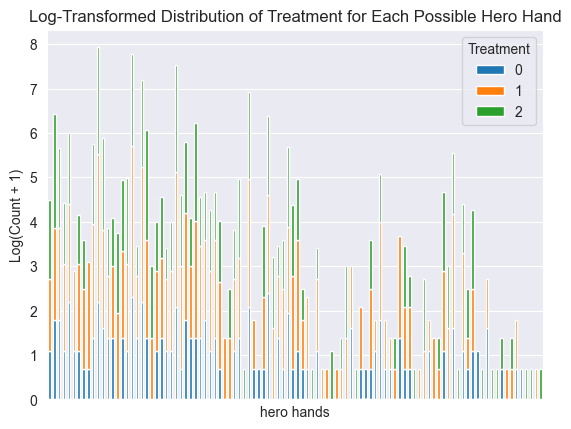

In [101]:
# Create a DataFrame from the lists
data = pd.DataFrame({'hero hands': hands, 'treatment': treatment})

# Count the occurrences of each (hands_strength, treatment) pair
count_data = data.groupby(['hero hands', 'treatment']).size().unstack(fill_value=0)

# Apply log transformation to the counts
log_count_data = np.log1p(count_data)  # Log transform the counts

# Plot stacked bar chart with log-transformed counts
log_count_data.plot(kind='bar', stacked=True)
plt.xticks([])
plt.xlabel('hero hands')
plt.ylabel('Log(Count + 1)')
plt.title('Log-Transformed Distribution of Treatment for Each Possible Hero Hand')
plt.legend(title='Treatment')
plt.show()

# Confidence Interval

In [102]:
with open("final_results.pkl", 'rb') as file:
    results = pickle.load(file)

In [103]:
alpha = 0.05

In [104]:
final_res = {}

In [105]:
for k1 in ['T=0', 'T=1', 'T=2']:
    for k2 in ['Outcome=0', 'Outcome=1', 'Outcome=2']:
        samples = [result[k1][k2] for result in results]
        ci = np.quantile(samples, [alpha/2, 1-alpha/2])
        estimate = np.mean(samples)
        final_res[f"{k1},{k2}"] = {'CI': ci, 'mean': estimate}

In [106]:
treatments_dict = {0: 'Small c-bet', 1: 'Medium c-bet', 2: 'Large c-bet'}
outcomes_dict = {0: 'Fold', 1: 'Call', 2: 'Raise'}

In [107]:
for t in range(3):
    print(f'Estimates for the treatment: "{treatments_dict[t]}"')
    for y in range(3):
        curr_result = final_res[f'T={t},Outcome={y}']
        estimate = curr_result['mean']
        ci = tuple(curr_result['CI'])
        outcome_name = outcomes_dict[y]
        print(f'\t"{outcome_name}" Outcome. Estimate: {estimate:.3f}, {100*(1-alpha)}% Confidence Interval: ({ci[0]:.3f},{ci[1]:.3f})')

Estimates for the treatment: "Small c-bet"
	"Fold" Outcome. Estimate: 0.433, 95.0% Confidence Interval: (0.410,0.455)
	"Call" Outcome. Estimate: 0.484, 95.0% Confidence Interval: (0.461,0.506)
	"Raise" Outcome. Estimate: 0.083, 95.0% Confidence Interval: (0.070,0.097)
Estimates for the treatment: "Medium c-bet"
	"Fold" Outcome. Estimate: 0.476, 95.0% Confidence Interval: (0.469,0.481)
	"Call" Outcome. Estimate: 0.445, 95.0% Confidence Interval: (0.439,0.451)
	"Raise" Outcome. Estimate: 0.080, 95.0% Confidence Interval: (0.076,0.083)
Estimates for the treatment: "Large c-bet"
	"Fold" Outcome. Estimate: 0.449, 95.0% Confidence Interval: (0.435,0.463)
	"Call" Outcome. Estimate: 0.487, 95.0% Confidence Interval: (0.472,0.502)
	"Raise" Outcome. Estimate: 0.064, 95.0% Confidence Interval: (0.057,0.072)


In [108]:
str2treatment = {'T=0': 'Small c-bet', 'T=1': 'Medium c-bet', 'T=2': 'Large c-bet'}
str2outcome = {'Outcome=0': 'Fold', 'Outcome=1': 'Call', 'Outcome=2': 'Raise'}
result_rows = []
for result_dict in results:
    for t_str in ['T=0', 'T=1', 'T=2']:
        for y_str in ['Outcome=0', 'Outcome=1', 'Outcome=2']:
            result = result_dict[t_str][y_str]
            entry = {'treatment': str2treatment[t_str], 'outcome': str2outcome[y_str], 'estimate': result}
            result_rows.append(entry)
result_df = pd.DataFrame(result_rows)

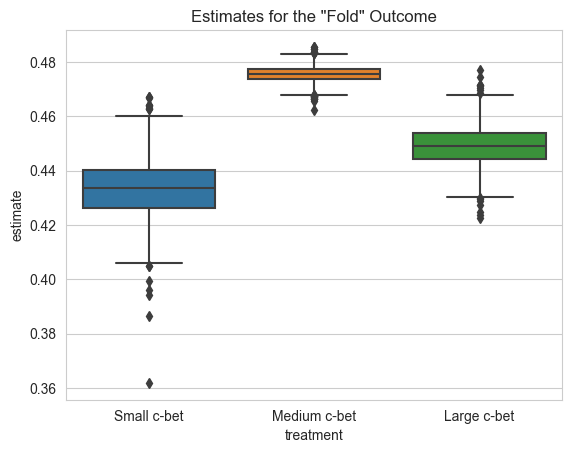

In [116]:
fold_df = result_df[result_df['outcome'] == 'Fold']
sns.boxplot(data=fold_df, x='treatment', y='estimate', order=['Small c-bet', 'Medium c-bet', 'Large c-bet'])
plt.title('Estimates for the "Fold" Outcome')
plt.show()

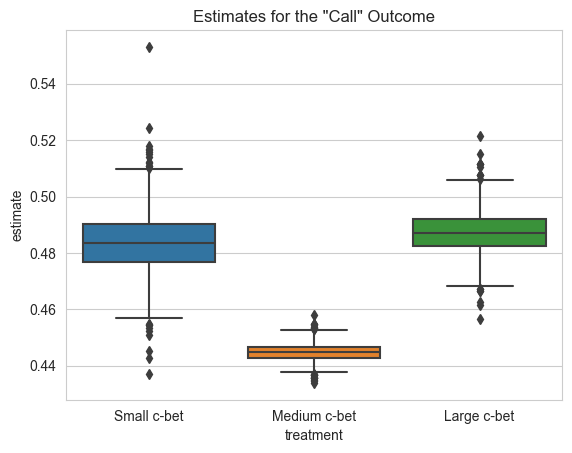

In [117]:
call_df = result_df[result_df['outcome'] == 'Call']
sns.boxplot(data=call_df, x='treatment', y='estimate', order=['Small c-bet', 'Medium c-bet', 'Large c-bet'])
plt.title('Estimates for the "Call" Outcome')
plt.show()

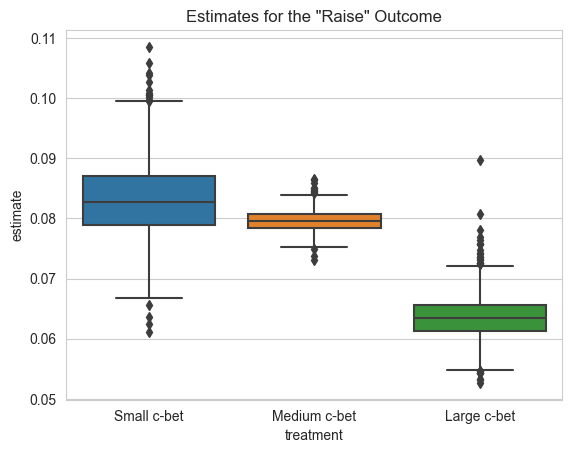

In [118]:
raise_df = result_df[result_df['outcome'] == 'Raise']
sns.boxplot(data=raise_df, x='treatment', y='estimate', order=['Small c-bet', 'Medium c-bet', 'Large c-bet'])
plt.title('Estimates for the "Raise" Outcome')
plt.show()